<a href="https://colab.research.google.com/github/StayshaPak/Electrochemistry_ITMO/blob/main/%D0%9F%D0%BE%D1%81%D1%82%D1%80%D0%BE%D0%B5%D0%BD%D0%B8%D0%B5_%D0%BA%D0%B0%D0%BB%D0%B8%D0%B1%D1%80%D0%BE%D0%B2%D0%BE%D1%87%D0%BD%D0%BE%D0%B3%D0%BE_%D0%B3%D1%80%D0%B0%D1%84%D0%B8%D0%BA%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Определение концентрации глифосата по калибровочной зависимости

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

In [ ]:
# 1. Загрузка данных из CSV-файла (или другого формата)
try:
    df_calibration = pd.read_excel("/content/drive/MyDrive/Магистратура/Д з на ДПО2025/Тема 2. Разработка и создание сенсорных систем/Задание 3. Определение концентрации глифосата по калибровочной зависимости/Задание 3.xlsx")
except FileNotFoundError:
    print("Ошибка: Файл не найден.")
    exit()

In [ ]:
# 2. Проверка наличия столбцов 'Glyphosate concetration / uM' и 'Measured Eoc / mV'

if 'Glyphosate concetration / uM' not in df_calibration.columns or 'Measured Eoc / mV' not in df_calibration.columns:
    print("Error: The CSV file must contain columns named 'Glyphosate concetration / uM' and 'Measured Eoc / mV'.")
    print(f"Columns found in CSV: {df_calibration.columns.tolist()}") #Показывает, что вообще есть в файле
    exit()

#Удаление строк с  NaN или пустые значения в важных столбцах
df_calibration = df_calibration.dropna(subset=['Glyphosate concetration / uM', 'Measured Eoc / mV'])

#Преобразование типов данных
try:
    df_calibration['Glyphosate concetration / uM'] = pd.to_numeric(df_calibration['Glyphosate concetration / uM'], errors='raise')
    df_calibration['Measured Eoc / mV'] = pd.to_numeric(df_calibration['Measured Eoc / mV'], errors='raise')

except ValueError as ve:
    print(f"Error: Non-numeric value found in 'Glyphosate concetration / uM' or 'Measured Eoc / mV' column.  Please ensure data is numeric. Details: {ve}")
    exit()

In [ ]:
# 4. Аппроксимация калибровочной прямой
slope, intercept, r_value, p_value, std_err = linregress(
    df_calibration['Glyphosate concetration / uM'], df_calibration['Measured Eoc / mV']
)
r_squared = r_value**2

# 5. Проверка коэффициента детерминации
if r_squared <= 0.950:
    print(f"Warning: R-squared = {r_squared:.5f} is less than 0.950. The calibration may not be reliable.")
else:
    print(f"R-squared = {r_squared:.5f}")

# 6. Вывод уравнения калибровочной прямой
print("\nCalibration Equation:")
print(f"Measured Eoc / mV = {slope:.2f} * Glyphosate concetration / uM + {intercept:.2f}")

R-squared = 0.97624

Calibration Equation:
Measured Eoc / mV = 11.74 * Glyphosate concetration / uM + 103.49


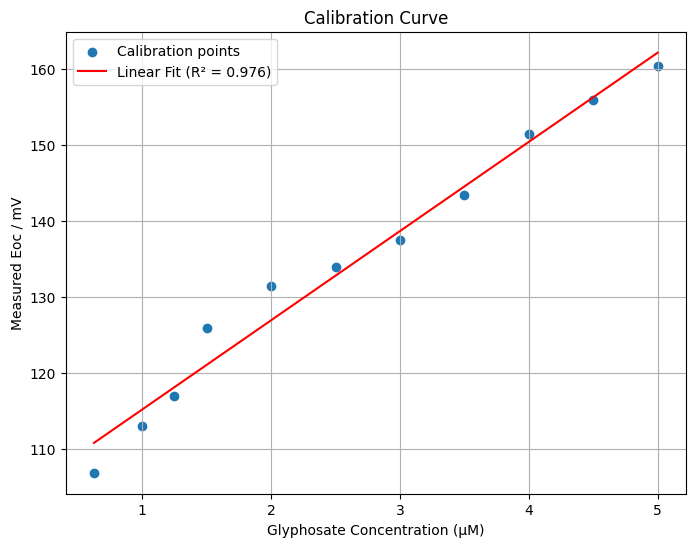

In [ ]:
# 7. Построение графика калибровочной кривой
plt.figure(figsize=(8, 6))
plt.scatter(df_calibration['Glyphosate concetration / uM'], df_calibration['Measured Eoc / mV'], label='Calibration points')

# Строим линию тренда
plt.plot(df_calibration['Glyphosate concetration / uM'], slope * df_calibration['Glyphosate concetration / uM'] + intercept, color='red', label=f'Linear Fit (R² = {r_squared:.3f})')

plt.xlabel('Glyphosate Concentration (μM)')
plt.ylabel('Measured Eoc / mV')
plt.title('Calibration Curve')
plt.grid(True)
plt.legend()
plt.show()

Анализ неизвестного образца

In [ ]:
# Запрос Eoc неизвестной пробы
while True:
    try:
        Eoc_unknown = float(input("Enter the Measured Eoc / mV) of the unknown sample: "))
        break
    except ValueError:
        print("Invalid input. Please enter a number.")

# Рассчитываем концентрацию
concentration_unknown = (Eoc_unknown - intercept) / slope

print("Результаты анализа:")
print(f"Measured Eoc / mV) = {Eoc_unknown:.2f}")
print(f"Calculated Glyphosate Concentration (μM) = {concentration_unknown:.2f}")

#Оценка достоверности результата
if concentration_unknown < df_calibration['Glyphosate concetration / uM'].min() or concentration_unknown > df_calibration['Glyphosate concetration / uM'].max():
  print("Warning: The calculated concentration is outside the range of the calibration curve. Extrapolation is unreliable.")

Enter the Measured Eoc / mV) of the unknown sample: 132
Результаты анализа:
Measured Eoc / mV) = 132.00
Calculated Glyphosate Concentration (μM) = 2.43
